In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_mixture
from autoencoder import network
from autoencoder import utils

In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/mmCompensatedTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

#print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_Ice.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish5_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish5_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_CCB.mm', '/media/cjw/Data/cyto/mmComp

dict_keys(['Fish3_CCB.mm', 'Fish4_ICE.mm', 'Fish3_Untreated.mm', 'Fish6_Untreated.mm', 'Fish2_Untreated.mm', 'Fish1_Ice.mm', 'Fish5_Untreated.mm', 'Fish6_ICE.mm', 'Fish4_CCB.mm', 'Fish6_CCB.mm', 'Fish2_CCB.mm', 'Fish1_Untreated.mm', 'Fish4_Untreated.mm', 'Fish2_ICE.mm', 'Fish5_CCB.mm', 'Fish3_ICE.mm', 'Fish1_CCB.mm', 'Fish5_ICE.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Encoder True
isize:  4 32
dh0 (?, 32, 32, 1)
Split [<tf.Tensor 'split:0' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:1' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:2' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:3' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:4' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:5' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:6' shape=(1, ?, 128) dtype=float32>, <tf.Tensor 'split:7' shape=(1, ?, 128) dtype=float32>]
Concat [None, 1024]
Stack Tensor("stack:0", shape=(8, ?, 128), dtype=float32)
pbar Tensor("Sum_1:0", shape=(), dtype=float32)
Stack Tensor("stack_1:0", shape=(8, ?, 32, 32, 1), dtype=float32)
S

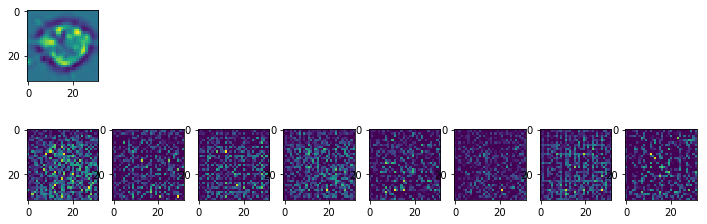

[ 0.12538645  0.12503919  0.12607221  0.12581943  0.12344982  0.12472273
  0.12710929  0.12240084]
[ 0.1253885   0.12503877  0.12608437  0.12582554  0.12342274  0.12472719
  0.12712789  0.12238497]
[ 0.12540522  0.12502052  0.12609068  0.12579644  0.12343761  0.12474255
  0.12708934  0.12241764]
[ 0.12537369  0.12501679  0.12603319  0.12577629  0.12351901  0.12475055
  0.12699442  0.12253598]
[ 0.12539548  0.12503564  0.12607412  0.12582873  0.1234286   0.1247388
  0.12711266  0.12238596]
(8, 128, 128)
Epoch:  0 Iteration:  200 Loss:  3967.55 5299.67 [ 1.75234044  1.7523402   1.75234103  1.75234067  1.75234115  1.75234115
  1.75234044  1.75234258  1.75234318  1.75234008  1.75234318  1.75234067
  1.75234067  1.7523402   1.75234079  1.75234067  1.7523402   1.75234115
  1.75234258  1.75234115  1.75234389  1.75234044  1.75234079  1.75234342
  1.75234187  1.75234008  1.75234067  1.75234222  1.7523402   1.75234067
  1.75234103  1.75234044  1.75233984  1.75234342  1.75234187  1.7523402
  1.75

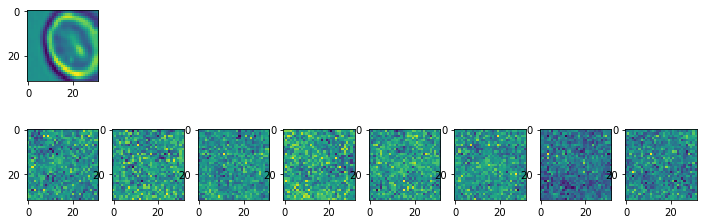

[ 0.21963064  0.02993493  0.22030801  0.22020236  0.02987073  0.0298899
  0.2203023   0.02986115]
[ 0.2196297   0.02993514  0.22030817  0.22020242  0.02987084  0.02989005
  0.22030246  0.02986125]
[ 0.21963069  0.02993493  0.22030801  0.22020239  0.02987072  0.02988989
  0.2203023   0.02986115]
[ 0.2196278   0.02993558  0.2203085   0.22020249  0.02987107  0.02989035
  0.22030278  0.02986145]
[ 0.2196303   0.02993501  0.22030808  0.2202024   0.02987077  0.02988995
  0.22030237  0.02986119]
(8, 128, 128)
Epoch:  0 Iteration:  400 Loss:  3896.01 5227.97 [ 1.75188637  1.75188637  1.75188732  1.75188625  1.75188637  1.75188649
  1.75188673  1.75188696  1.75188768  1.75188637  1.75188661  1.75188804
  1.75188816  1.75188816  1.75188863  1.75188828  1.75188768  1.75188696
  1.75188637  1.75188804  1.75188637  1.75188816  1.75188673  1.75188696
  1.75188637  1.75188732  1.75188673  1.75188613  1.75188649  1.75188637
  1.75188887  1.75188661  1.75188673  1.75188804  1.75188828  1.75188816
  1.7

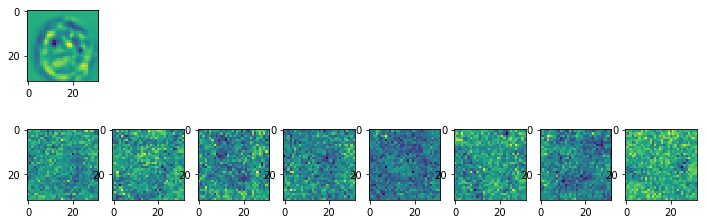

[ 0.21998677  0.02985019  0.22023854  0.22020097  0.02982607  0.02983353
  0.22024095  0.0298229 ]
[ 0.21998739  0.02985003  0.22023843  0.220201    0.02982597  0.02983342
  0.22024086  0.02982283]
[ 0.21998742  0.02985003  0.22023843  0.220201    0.02982597  0.02983342
  0.22024086  0.02982283]
[ 0.2199863   0.02985032  0.22023864  0.22020099  0.02982613  0.02983362
  0.22024105  0.02982296]
[ 0.2199876   0.02984999  0.22023842  0.220201    0.02982595  0.02983339
  0.22024085  0.02982282]
(8, 128, 128)
Epoch:  0 Iteration:  600 Loss:  3765.47 5097.47 [ 1.7517662   1.75176632  1.75176632  1.75176644  1.75176644  1.75176632
  1.7517662   1.75176668  1.7517662   1.75176644  1.75176668  1.75176764
  1.75176704  1.75176644  1.75176668  1.7517662   1.75176728  1.7517662
  1.7517668   1.75176668  1.75176644  1.75176632  1.7517662   1.75176644
  1.75176692  1.75176668  1.7517668   1.7517674   1.75176644  1.7517662
  1.7517662   1.75176632  1.7517662   1.75176609  1.75176644  1.7517668
  1.751

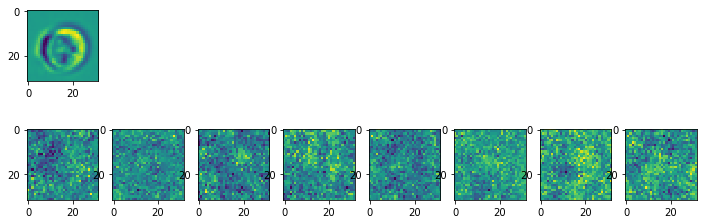

[ 0.22008483  0.02982706  0.2202204   0.22020027  0.02981419  0.0298182
  0.22022247  0.02981256]
[ 0.22008458  0.02982712  0.22022046  0.22020029  0.02981422  0.02981824
  0.2202225   0.02981259]
[ 0.22008458  0.02982712  0.22022046  0.22020029  0.02981422  0.02981824
  0.2202225   0.02981259]
[ 0.22008406  0.02982725  0.22022055  0.22020026  0.0298143   0.02981834
  0.22022259  0.02981265]
[ 0.22008477  0.02982707  0.2202204   0.22020027  0.0298142   0.02981821
  0.22022247  0.02981256]
(8, 128, 128)
Epoch:  0 Iteration:  800 Loss:  3767.01 5099.05 [ 1.75171566  1.75171554  1.75171578  1.75171614  1.75171554  1.7517159
  1.75171578  1.75171638  1.75171614  1.75171566  1.7517159   1.75171566
  1.75171554  1.75171578  1.75171566  1.75171614  1.75171614  1.7517159
  1.75171602  1.75171614  1.75171638  1.75171566  1.75171614  1.75171554
  1.75171578  1.7517159   1.75171578  1.75171638  1.75171554  1.75171554
  1.75171554  1.75171578  1.75171566  1.7517159   1.75171566  1.75171554
  1.751

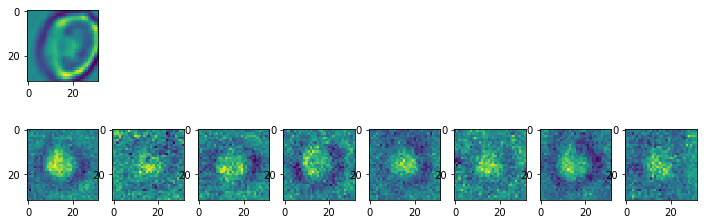

[ 0.22012593  0.02981742  0.22021298  0.22019999  0.02980928  0.02981184
  0.22021437  0.02980825]
[ 0.22012612  0.02981737  0.22021292  0.22019997  0.02980925  0.02981179
  0.22021431  0.02980822]
[ 0.22012624  0.02981734  0.22021292  0.2202      0.02980923  0.02981178
  0.22021431  0.02980822]
[ 0.22012582  0.02981746  0.22021303  0.22019999  0.0298093   0.02981186
  0.22021441  0.02980827]
[ 0.22012627  0.02981733  0.22021292  0.22019999  0.02980923  0.02981177
  0.22021429  0.02980821]
(8, 128, 128)
Epoch:  0 Iteration:  1000 Loss:  3657.52 4989.6 [ 1.75168872  1.75168896  1.7516886   1.75168896  1.75168908  1.7516886
  1.7516886   1.7516886   1.7516886   1.75168896  1.7516886   1.75168908
  1.75168908  1.75168943  1.75168896  1.75168884  1.75168908  1.75168872
  1.75168884  1.7516886   1.75168872  1.75168872  1.7516886   1.75168872
  1.7516886   1.75168872  1.7516886   1.7516886   1.7516886   1.75168872
  1.7516886   1.7516886   1.75168872  1.7516886   1.75168872  1.7516886
  1.75

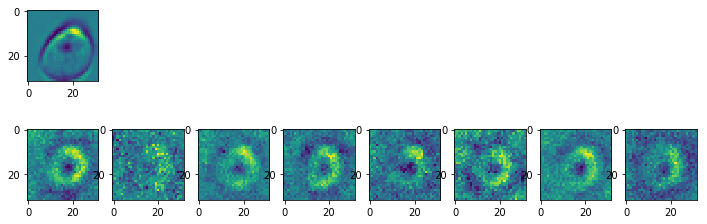

[ 0.22014798  0.02981229  0.22020885  0.22019982  0.02980666  0.02980844
  0.22021002  0.02980596]
[ 0.22014809  0.02981226  0.22020882  0.22019979  0.02980665  0.02980842
  0.22020999  0.02980595]
[ 0.22014812  0.02981225  0.22020881  0.22019981  0.02980664  0.02980841
  0.22020997  0.02980594]
[ 0.2201477   0.02981237  0.2202089   0.22019981  0.0298067   0.02980849
  0.22021006  0.02980599]
[ 0.220148    0.02981229  0.22020885  0.22019982  0.02980666  0.02980844
  0.22021002  0.02980596]
(8, 128, 128)
Epoch:  0 Iteration:  1200 Loss:  3591.23 4923.42 [ 1.75167263  1.75167298  1.75167298  1.75167274  1.75167274  1.75167274
  1.75167394  1.75167274  1.75167263  1.75167298  1.75167263  1.75167322
  1.75167263  1.75167298  1.75167263  1.75167322  1.75167298  1.75167263
  1.75167274  1.75167298  1.75167263  1.75167263  1.75167322  1.75167322
  1.75167263  1.75167358  1.75167298  1.75167274  1.75167322  1.75167406
  1.75167322  1.75167298  1.75167322  1.75167298  1.75167263  1.75167274
  1

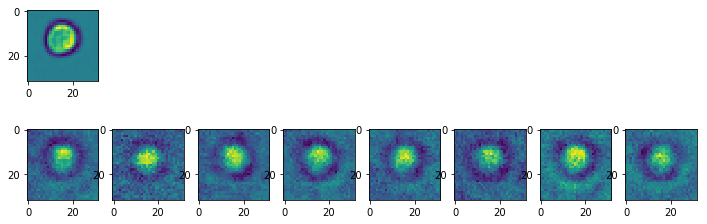

[ 0.22016174  0.02980916  0.22020629  0.22019967  0.02980506  0.02980636
  0.22020717  0.02980455]
[ 0.22016181  0.02980914  0.22020626  0.22019967  0.02980505  0.02980634
  0.22020714  0.02980454]
[ 0.2201618   0.02980915  0.22020626  0.22019967  0.02980505  0.02980634
  0.22020714  0.02980454]
[ 0.22016139  0.02980925  0.22020635  0.22019966  0.02980511  0.02980642
  0.22020721  0.02980459]
[ 0.22016177  0.02980915  0.22020629  0.22019967  0.02980506  0.02980636
  0.22020717  0.02980455]
(8, 128, 128)
Epoch:  0 Iteration:  1400 Loss:  3552.2 4884.45 [ 1.75166237  1.75166202  1.75166237  1.75166202  1.75166237  1.75166237
  1.75166237  1.75166237  1.75166237  1.75166225  1.75166237  1.75166249
  1.75166285  1.75166237  1.75166225  1.75166237  1.75166237  1.75166237
  1.75166237  1.75166225  1.75166214  1.75166273  1.75166214  1.75166214
  1.75166214  1.75166237  1.75166249  1.75166202  1.75166214  1.75166237
  1.75166237  1.75166237  1.75166237  1.75166237  1.75166237  1.75166214
  1.

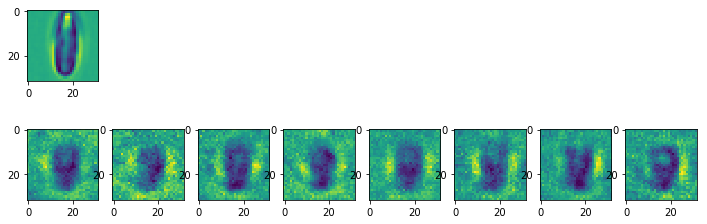

[ 0.2201703   0.02980723  0.22020467  0.22019958  0.02980407  0.02980508
  0.22020538  0.02980368]
[ 0.22017056  0.02980717  0.22020462  0.2201996   0.02980404  0.02980503
  0.22020534  0.02980365]
[ 0.22017044  0.0298072   0.22020462  0.22019957  0.02980405  0.02980505
  0.22020534  0.02980366]
[ 0.2201703   0.02980723  0.22020467  0.22019958  0.02980407  0.02980508
  0.22020538  0.02980368]
[ 0.22017047  0.0298072   0.22020465  0.2201996   0.02980405  0.02980505
  0.22020537  0.02980366]
(8, 128, 128)
Epoch:  1 Iteration:  0 Loss:  3565.24 4897.52 [ 1.75166214  1.75166225  1.75166225  1.75166202  1.75166202  1.7516619
  1.75166214  1.75166214  1.75166225  1.75166214  1.75166225  1.75166214
  1.75166214  1.75166225  1.75166237  1.75166214  1.7516619   1.75166225
  1.75166225  1.75166225  1.75166237  1.75166225  1.75166225  1.75166214
  1.75166225  1.75166237  1.75166202  1.75166202  1.75166237  1.75166237
  1.75166225  1.75166214  1.75166214  1.75166214  1.75166225  1.75166237
  1.751

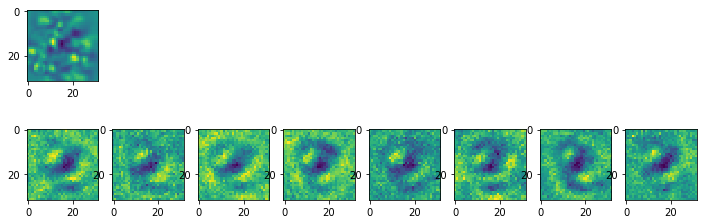

[ 0.22017039  0.02980722  0.22020465  0.22019957  0.02980407  0.02980507
  0.22020537  0.02980367]
[ 0.22017069  0.02980714  0.22020458  0.22019958  0.02980402  0.02980501
  0.22020529  0.02980364]
[ 0.22017056  0.02980718  0.22020462  0.2201996   0.02980404  0.02980504
  0.22020534  0.02980365]
[ 0.22017039  0.02980723  0.22020467  0.22019958  0.02980407  0.02980508
  0.22020538  0.02980368]
[ 0.22017066  0.02980715  0.22020461  0.2201996   0.02980403  0.02980502
  0.22020532  0.02980364]
(8, 128, 128)
Epoch:  1 Iteration:  200 Loss:  3494.43 4826.76 [ 1.75165498  1.75165498  1.75165498  1.75165522  1.75165534  1.75165534
  1.75165498  1.75165546  1.75165534  1.75165546  1.75165534  1.75165522
  1.75165498  1.75165498  1.75165498  1.7516551   1.7516551   1.75165498
  1.75165594  1.75165498  1.75165534  1.75165522  1.75165534  1.75165534
  1.75165534  1.75165474  1.75165474  1.75165534  1.75165534  1.75165534
  1.75165498  1.75165534  1.75165534  1.75165522  1.75165534  1.75165498
  1.

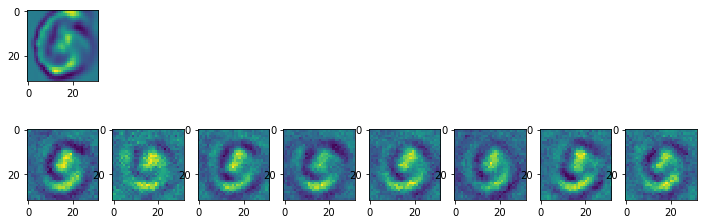

[ 0.22017632  0.02980587  0.22020353  0.22019954  0.02980338  0.02980417
  0.22020411  0.02980306]
[ 0.22017667  0.02980578  0.22020346  0.22019956  0.02980332  0.0298041
  0.22020404  0.02980302]
[ 0.22017659  0.0298058   0.22020346  0.22019954  0.02980333  0.02980412
  0.22020404  0.02980302]
[ 0.22017647  0.02980584  0.22020352  0.22019956  0.02980336  0.02980415
  0.2202041   0.02980305]
[ 0.22017664  0.02980579  0.22020346  0.22019954  0.02980333  0.02980411
  0.22020404  0.02980302]
(8, 128, 128)
Epoch:  1 Iteration:  400 Loss:  3476.75 4809.16 [ 1.75164986  1.75164998  1.75165033  1.75164998  1.75164986  1.75164986
  1.75165009  1.75164986  1.75164998  1.75164998  1.75164998  1.75165009
  1.75165033  1.75165045  1.75164986  1.75165009  1.75165009  1.75164998
  1.75164974  1.75164986  1.75164998  1.75165164  1.75164998  1.75165033
  1.75164986  1.75165057  1.75164986  1.75164974  1.75164998  1.75164998
  1.75165033  1.75164974  1.75164998  1.75165033  1.75165033  1.75164998
  1.7

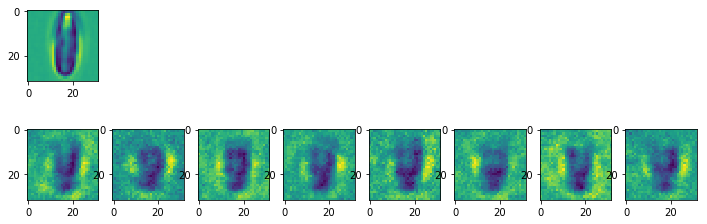

[ 0.22018075  0.02980487  0.22020271  0.22019953  0.02980286  0.02980351
  0.22020319  0.02980261]
[ 0.22018094  0.02980482  0.22020265  0.22019951  0.02980283  0.02980346
  0.22020315  0.02980258]
[ 0.22018088  0.02980484  0.22020267  0.22019951  0.02980284  0.02980347
  0.22020315  0.02980259]
[ 0.22018075  0.02980487  0.22020271  0.22019953  0.02980286  0.02980351
  0.22020319  0.02980261]
[ 0.22018094  0.02980482  0.22020265  0.22019951  0.02980283  0.02980346
  0.22020315  0.02980258]
(8, 128, 128)
Epoch:  1 Iteration:  600 Loss:  3449.78 4782.17 [ 1.75164592  1.75164604  1.75164604  1.75164592  1.75164592  1.75164592
  1.75164604  1.75164592  1.75164592  1.75164628  1.75164604  1.75164628
  1.7516464   1.75164628  1.75164604  1.75164604  1.75164628  1.75164592
  1.75164676  1.75164592  1.75164604  1.75164592  1.75164604  1.75164628
  1.7516464   1.75164592  1.75164592  1.75164628  1.75164592  1.75164592
  1.75164604  1.75164592  1.75164604  1.75164604  1.75164628  1.75164628
  1.

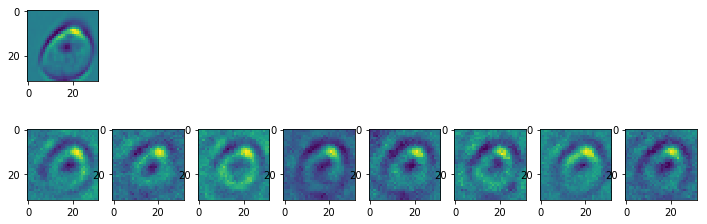

[ 0.22018416  0.0298041   0.22020207  0.22019948  0.02980246  0.02980299
  0.22020248  0.02980226]
[ 0.22018422  0.02980409  0.22020207  0.2201995   0.02980246  0.02980298
  0.22020248  0.02980226]
[ 0.22018416  0.0298041   0.22020206  0.22019947  0.02980246  0.02980298
  0.22020245  0.02980225]
[ 0.22018406  0.02980412  0.22020209  0.22019947  0.02980248  0.029803
  0.22020249  0.02980227]
[ 0.22018422  0.02980409  0.22020207  0.2201995   0.02980246  0.02980298
  0.22020248  0.02980226]
(8, 128, 128)
Epoch:  1 Iteration:  800 Loss:  3460.24 4792.68 [ 1.75164318  1.75164282  1.75164318  1.75164318  1.75164318  1.75164318
  1.75164318  1.75164342  1.75164366  1.75164318  1.75164318  1.75164294
  1.75164318  1.75164342  1.75164282  1.75164318  1.75164342  1.75164342
  1.75164318  1.75164318  1.75164318  1.75164318  1.75164318  1.75164342
  1.75164294  1.75164342  1.75164282  1.75164294  1.75164282  1.75164318
  1.75164318  1.75164318  1.75164282  1.75164282  1.75164282  1.75164282
  1.75

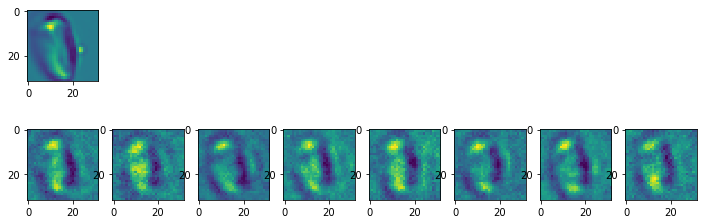

[ 0.22018656  0.02980357  0.22020163  0.22019947  0.02980219  0.02980263
  0.22020197  0.02980202]
[ 0.22018673  0.02980354  0.22020161  0.22019947  0.02980218  0.02980261
  0.22020197  0.029802  ]
[ 0.2201867   0.02980353  0.2202016   0.22019947  0.02980217  0.02980261
  0.22020194  0.029802  ]
[ 0.22018653  0.02980357  0.22020163  0.22019945  0.02980219  0.02980263
  0.22020197  0.02980202]
[ 0.2201867   0.02980354  0.2202016   0.22019947  0.02980217  0.02980261
  0.22020194  0.029802  ]
(8, 128, 128)
Epoch:  1 Iteration:  1000 Loss:  3450.47 4782.87 [ 1.75164092  1.75164104  1.75164068  1.75164104  1.75164127  1.75164068
  1.75164068  1.75164068  1.75164068  1.75164104  1.75164068  1.75164104
  1.75164092  1.75164151  1.75164127  1.75164092  1.75164092  1.75164104
  1.75164115  1.75164068  1.75164115  1.75164092  1.75164068  1.75164068
  1.75164068  1.75164068  1.7516408   1.75164092  1.75164068  1.75164068
  1.75164068  1.75164068  1.75164092  1.75164068  1.75164115  1.75164068
  1

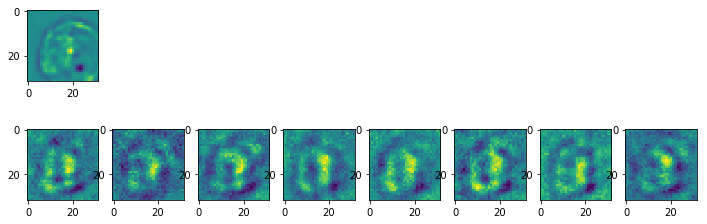

[ 0.22018869  0.02980308  0.22020122  0.22019944  0.02980194  0.0298023
  0.22020152  0.0298018 ]
[ 0.22018866  0.02980309  0.22020122  0.22019944  0.02980194  0.02980231
  0.22020152  0.0298018 ]
[ 0.22018866  0.02980309  0.22020124  0.22019944  0.02980194  0.02980231
  0.22020152  0.0298018 ]
[ 0.22018851  0.02980314  0.22020127  0.22019944  0.02980197  0.02980234
  0.22020157  0.02980182]
[ 0.22018869  0.02980309  0.22020124  0.22019944  0.02980194  0.02980231
  0.22020152  0.0298018 ]
(8, 128, 128)
Epoch:  1 Iteration:  1200 Loss:  3413.74 4746.22 [ 1.75163877  1.75163889  1.75163889  1.75163877  1.75163889  1.75163889
  1.75163913  1.75163877  1.75163877  1.75163889  1.75163913  1.75163913
  1.75163877  1.75163889  1.75163889  1.75163889  1.75163889  1.75163889
  1.75163877  1.75163889  1.75163877  1.75163889  1.75163913  1.75163913
  1.75163889  1.75163949  1.75163889  1.75163889  1.75163913  1.75163984
  1.75163913  1.75163889  1.75163913  1.75163925  1.75163889  1.75163889
  1.

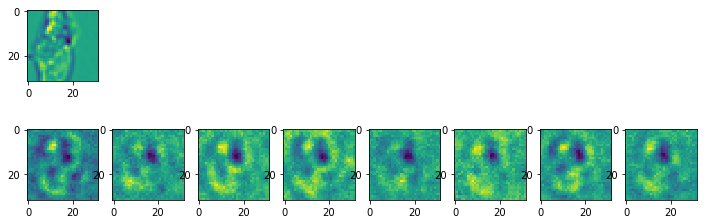

[ 0.22019023  0.02980275  0.22020094  0.22019941  0.02980177  0.02980208
  0.22020121  0.02980165]
[ 0.22019023  0.02980274  0.22020093  0.22019941  0.02980177  0.02980208
  0.22020118  0.02980164]
[ 0.22019023  0.02980274  0.22020093  0.22019941  0.02980177  0.02980207
  0.22020118  0.02980164]
[ 0.22019005  0.02980278  0.22020096  0.22019941  0.02980178  0.0298021
  0.22020122  0.02980166]
[ 0.22019023  0.02980274  0.22020093  0.22019941  0.02980177  0.02980207
  0.22020118  0.02980164]
(8, 128, 128)
Epoch:  1 Iteration:  1400 Loss:  3424.01 4756.46 [ 1.75163746  1.75163746  1.75163746  1.75163734  1.75163746  1.75163722
  1.75163734  1.75163758  1.75163758  1.75163734  1.75163758  1.7516377
  1.75163758  1.75163734  1.75163734  1.75163734  1.75163734  1.75163746
  1.75163746  1.75163734  1.75163722  1.75163758  1.75163722  1.75163722
  1.75163758  1.75163794  1.75163746  1.75163746  1.75163746  1.75163746
  1.75163758  1.75163758  1.75163758  1.75163746  1.75163734  1.75163746
  1.7

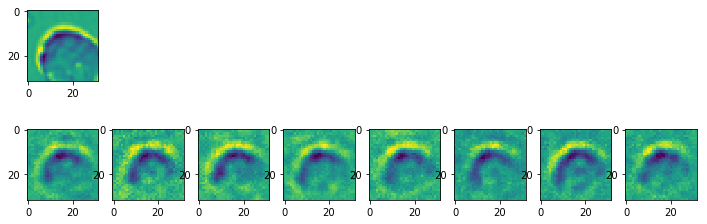

[ 0.22019136  0.0298025   0.22020075  0.22019939  0.02980164  0.02980191
  0.22020096  0.02980154]
[ 0.22019154  0.02980244  0.22020066  0.22019939  0.02980161  0.02980188
  0.2202009   0.0298015 ]
[ 0.22019151  0.02980245  0.22020069  0.22019939  0.02980161  0.02980188
  0.2202009   0.02980151]
[ 0.22019142  0.02980248  0.22020072  0.22019939  0.02980163  0.0298019
  0.22020093  0.02980153]
[ 0.22019151  0.02980245  0.22020069  0.22019939  0.02980161  0.02980188
  0.2202009   0.02980151]
(8, 128, 128)
Epoch:  2 Iteration:  0 Loss:  3399.72 4732.25 [ 1.75163722  1.75163746  1.75163734  1.75163722  1.75163722  1.75163722
  1.75163722  1.7516371   1.75163734  1.75163746  1.7516371   1.75163746
  1.75163722  1.75163746  1.75163758  1.75163734  1.75163722  1.75163758
  1.75163722  1.75163746  1.75163829  1.75163746  1.75163758  1.75163722
  1.7516371   1.75163758  1.75163722  1.75163746  1.7516377   1.75163722
  1.75163722  1.7516371   1.75163722  1.7516371   1.75163722  1.75163829
  1.751

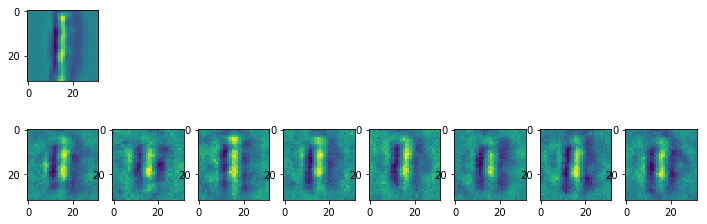

[ 0.22019145  0.02980248  0.22020072  0.22019939  0.02980163  0.0298019
  0.22020093  0.02980153]
[ 0.22019151  0.02980245  0.22020069  0.22019939  0.02980161  0.02980188
  0.2202009   0.02980151]
[ 0.22019149  0.02980245  0.22020069  0.22019939  0.02980162  0.02980188
  0.2202009   0.02980151]
[ 0.22019134  0.0298025   0.22020073  0.22019941  0.02980164  0.02980192
  0.22020097  0.02980154]
[ 0.22019151  0.02980245  0.22020066  0.22019939  0.02980161  0.02980188
  0.2202009   0.02980151]
(8, 128, 128)
Epoch:  2 Iteration:  200 Loss:  3374.57 4707.08 [ 1.75163627  1.75163627  1.75163627  1.75163627  1.75163603  1.75163615
  1.75163591  1.75163627  1.75163603  1.75163627  1.75163627  1.75163615
  1.75163627  1.75163627  1.75163603  1.75163627  1.75163615  1.75163627
  1.75163674  1.75163591  1.75163615  1.75163627  1.75163615  1.75163615
  1.75163603  1.75163627  1.75163627  1.75163615  1.75163627  1.75163627
  1.75163603  1.75163615  1.75163603  1.75163627  1.75163615  1.75163627
  1.7

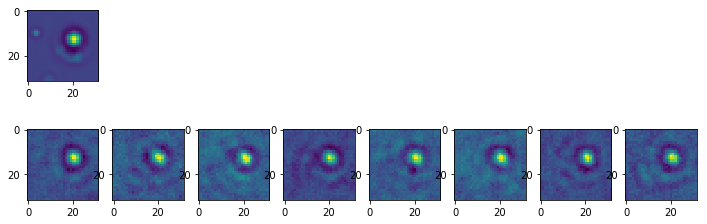

[ 0.22019261  0.02980221  0.22020048  0.22019939  0.02980149  0.02980172
  0.22020067  0.0298014 ]
[ 0.2201926   0.02980221  0.22020048  0.22019938  0.02980149  0.02980172
  0.22020067  0.0298014 ]
[ 0.2201926   0.02980221  0.22020049  0.22019939  0.02980149  0.02980173
  0.22020069  0.0298014 ]
[ 0.22019246  0.02980225  0.22020052  0.22019938  0.02980151  0.02980174
  0.22020072  0.02980142]
[ 0.2201926   0.02980221  0.22020048  0.22019938  0.02980149  0.02980172
  0.22020067  0.0298014 ]
(8, 128, 128)
Epoch:  2 Iteration:  400 Loss:  3359.2 4691.78 [ 1.75163507  1.75163507  1.75163507  1.75163507  1.75163507  1.75163507
  1.75163507  1.75163507  1.75163507  1.75163519  1.75163507  1.75163519
  1.75163531  1.75163555  1.75163507  1.75163519  1.75163507  1.75163507
  1.75163507  1.75163507  1.75163507  1.7516371   1.75163507  1.75163615
  1.75163507  1.75163615  1.75163496  1.75163507  1.75163519  1.75163507
  1.75163496  1.75163507  1.75163507  1.75163519  1.75163555  1.75163507
  1.7

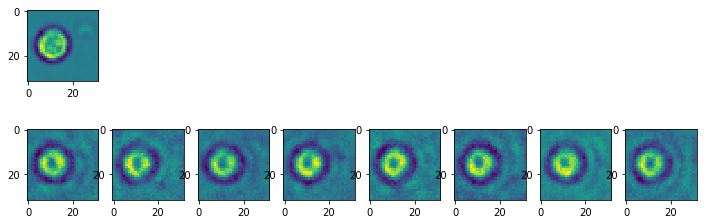

[ 0.2201934   0.02980203  0.22020034  0.22019936  0.0298014   0.0298016
  0.22020051  0.02980132]
[ 0.22019349  0.02980202  0.22020034  0.22019936  0.0298014   0.0298016
  0.22020051  0.02980132]
[ 0.22019349  0.02980202  0.22020034  0.22019936  0.0298014   0.0298016
  0.22020051  0.02980132]
[ 0.22019328  0.02980207  0.22020037  0.22019936  0.02980142  0.02980163
  0.22020054  0.02980134]
[ 0.22019349  0.02980202  0.22020034  0.22019936  0.02980139  0.02980159
  0.22020051  0.02980131]
(8, 128, 128)
Epoch:  2 Iteration:  600 Loss:  3355.39 4687.93 [ 1.75163436  1.75163436  1.75163436  1.751634    1.751634    1.751634
  1.751634    1.75163436  1.751634    1.75163412  1.751634    1.75163436
  1.75163436  1.75163472  1.751634    1.751634    1.7516346   1.751634
  1.7516346   1.75163436  1.75163436  1.75163436  1.751634    1.75163436
  1.75163448  1.75163436  1.75163436  1.75163448  1.75163436  1.751634
  1.75163436  1.75163436  1.751634    1.75163448  1.75163448  1.75163436
  1.75163436 

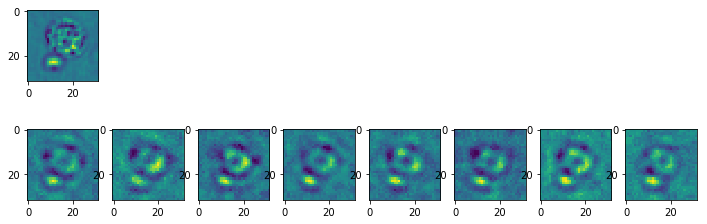

[ 0.22019424  0.02980185  0.2202002   0.22019935  0.0298013   0.02980148
  0.22020034  0.02980124]
[ 0.22019424  0.02980185  0.2202002   0.22019938  0.02980131  0.02980148
  0.22020034  0.02980124]
[ 0.22019422  0.02980186  0.2202002   0.22019935  0.02980131  0.02980148
  0.22020034  0.02980124]
[ 0.22019406  0.0298019   0.22020024  0.22019936  0.02980133  0.02980152
  0.22020039  0.02980126]
[ 0.22019422  0.02980185  0.2202002   0.22019935  0.02980131  0.02980148
  0.22020034  0.02980124]
(8, 128, 128)
Epoch:  2 Iteration:  800 Loss:  3359.88 4692.48 [ 1.75163352  1.75163341  1.75163329  1.75163352  1.75163341  1.75163352
  1.75163364  1.75163352  1.75163436  1.75163352  1.75163364  1.75163329
  1.75163341  1.75163352  1.75163341  1.75163376  1.75163352  1.75163364
  1.75163352  1.75163352  1.75163364  1.75163364  1.75163352  1.75163329
  1.75163329  1.75163341  1.75163341  1.75163352  1.75163329  1.75163352
  1.75163341  1.75163352  1.75163329  1.75163341  1.75163341  1.75163329
  1.

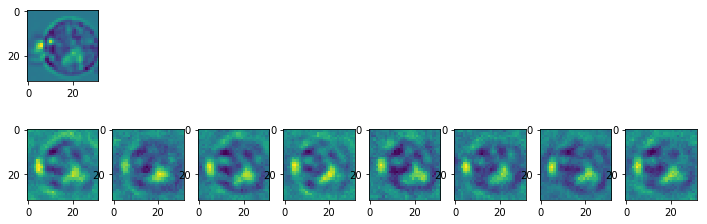

[ 0.22019486  0.02980171  0.22020006  0.22019936  0.02980123  0.02980139
  0.22020021  0.02980118]
[ 0.22019486  0.02980171  0.22020006  0.22019936  0.02980123  0.02980139
  0.22020021  0.02980118]
[ 0.22019483  0.02980172  0.22020006  0.22019935  0.02980123  0.02980139
  0.22020021  0.02980118]
[ 0.2201947   0.02980176  0.22020011  0.22019935  0.02980126  0.02980142
  0.22020026  0.0298012 ]
[ 0.22019488  0.02980171  0.22020009  0.22019936  0.02980123  0.02980139
  0.22020021  0.02980118]
(8, 128, 128)
Epoch:  2 Iteration:  1000 Loss:  3342.67 4675.22 [ 1.75163281  1.75163281  1.75163281  1.75163281  1.75163305  1.75163281
  1.75163281  1.75163281  1.75163281  1.75163293  1.75163281  1.75163317
  1.75163293  1.75163329  1.75163329  1.75163281  1.75163281  1.75163281
  1.75163293  1.75163281  1.75163281  1.75163281  1.75163281  1.75163293
  1.75163281  1.75163293  1.75163293  1.75163281  1.75163281  1.75163281
  1.75163281  1.75163281  1.75163293  1.75163281  1.75163281  1.75163281
  1

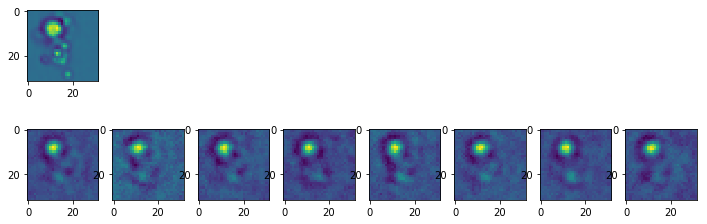

[ 0.22019537  0.0298016   0.22019997  0.22019933  0.02980117  0.02980131
  0.22020009  0.02980112]
[ 0.22019538  0.0298016   0.22019997  0.22019933  0.02980117  0.0298013
  0.22020009  0.02980112]
[ 0.22019537  0.0298016   0.22019997  0.22019933  0.02980117  0.02980131
  0.22020009  0.02980112]
[ 0.22019519  0.02980164  0.22020002  0.22019932  0.0298012   0.02980134
  0.22020014  0.02980115]
[ 0.22019537  0.0298016   0.22019997  0.22019933  0.02980117  0.02980131
  0.22020009  0.02980112]
(8, 128, 128)
Epoch:  2 Iteration:  1200 Loss:  3338.58 4671.17 [ 1.75163233  1.75163233  1.75163233  1.75163233  1.75163221  1.75163233
  1.75163281  1.75163221  1.75163221  1.75163233  1.75163257  1.75163233
  1.75163221  1.75163233  1.75163233  1.75163209  1.75163233  1.75163233
  1.75163233  1.75163233  1.75163233  1.75163233  1.75163233  1.75163233
  1.75163221  1.75163233  1.75163233  1.75163233  1.75163233  1.75163281
  1.75163233  1.75163233  1.75163233  1.75163281  1.75163209  1.75163233
  1.

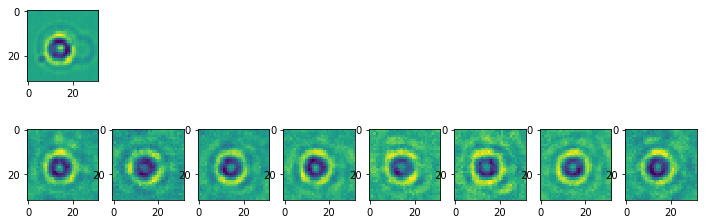

[ 0.22019583  0.0298015   0.2201999   0.22019933  0.02980112  0.02980124
  0.2202      0.02980108]
[ 0.22019586  0.02980149  0.2201999   0.22019933  0.02980112  0.02980124
  0.2202      0.02980108]
[ 0.22019584  0.0298015   0.2201999   0.22019933  0.02980112  0.02980124
  0.2202      0.02980108]
[ 0.22019567  0.02980154  0.22019991  0.2201993   0.02980115  0.02980127
  0.22020002  0.02980109]
[ 0.22019586  0.02980149  0.2201999   0.22019933  0.02980112  0.02980124
  0.2202      0.02980108]
(8, 128, 128)
Epoch:  2 Iteration:  1400 Loss:  3333.26 4665.87 [ 1.75163174  1.75163186  1.75163174  1.75163174  1.75163174  1.75163174
  1.75163174  1.75163174  1.75163221  1.75163174  1.75163186  1.75163186
  1.75163209  1.75163174  1.75163174  1.75163174  1.75163186  1.75163174
  1.75163174  1.75163174  1.75163174  1.75163186  1.75163174  1.75163174
  1.75163174  1.75163221  1.75163174  1.75163174  1.75163174  1.75163174
  1.75163198  1.75163174  1.75163186  1.75163174  1.75163174  1.75163174
  1

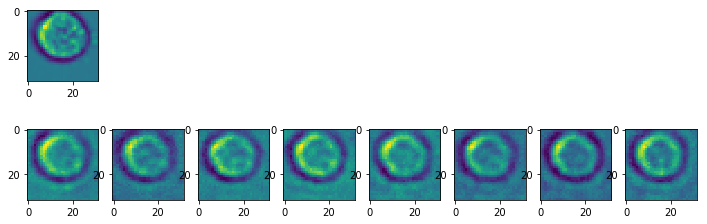

[ 0.22019611  0.02980143  0.22019982  0.2201993   0.02980109  0.0298012
  0.22019993  0.02980105]
[ 0.22019622  0.02980141  0.22019981  0.22019932  0.02980108  0.02980118
  0.22019991  0.02980104]
[ 0.22019625  0.02980141  0.22019981  0.22019932  0.02980107  0.02980118
  0.22019991  0.02980104]
[ 0.22019607  0.02980145  0.22019985  0.22019933  0.0298011   0.02980122
  0.22019996  0.02980106]
[ 0.22019625  0.0298014   0.22019984  0.22019933  0.02980107  0.02980118
  0.22019991  0.02980104]
(8, 128, 128)
Epoch:  3 Iteration:  0 Loss:  3326.53 4659.18 [ 1.75163174  1.75163174  1.75163174  1.75163174  1.75163174  1.75163174
  1.75163174  1.75163174  1.75163174  1.75163174  1.75163174  1.75163174
  1.75163174  1.75163209  1.75163186  1.75163174  1.75163174  1.75163174
  1.75163174  1.75163174  1.75163281  1.75163174  1.75163209  1.75163174
  1.75163174  1.75163186  1.75163174  1.75163174  1.75163186  1.75163174
  1.75163174  1.75163174  1.75163174  1.75163174  1.75163186  1.75163233
  1.751

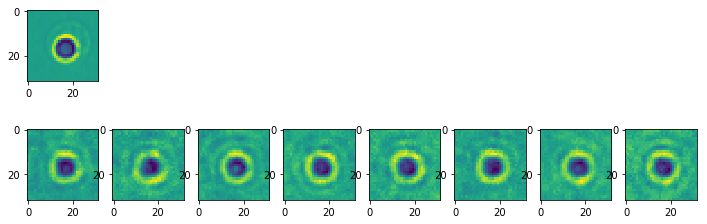

[ 0.22019625  0.0298014   0.22019981  0.22019932  0.02980107  0.02980118
  0.22019991  0.02980104]
[ 0.22019625  0.0298014   0.22019981  0.22019932  0.02980107  0.02980118
  0.22019991  0.02980104]
[ 0.22019625  0.0298014   0.22019984  0.22019933  0.02980107  0.02980118
  0.22019991  0.02980104]
[ 0.22019605  0.02980145  0.22019982  0.2201993   0.0298011   0.02980121
  0.22019993  0.02980105]
[ 0.22019626  0.0298014   0.22019982  0.22019933  0.02980107  0.02980118
  0.22019993  0.02980104]
(8, 128, 128)
Epoch:  3 Iteration:  200 Loss:  3320.59 4653.19 [ 1.75163126  1.75163126  1.75163126  1.75163126  1.75163138  1.75163138
  1.75163126  1.75163138  1.75163138  1.75163138  1.75163162  1.75163138
  1.75163162  1.75163126  1.75163126  1.75163138  1.75163126  1.75163126
  1.75163198  1.75163126  1.75163162  1.75163138  1.75163138  1.75163162
  1.75163138  1.75163126  1.75163126  1.75163138  1.75163126  1.75163126
  1.75163126  1.75163138  1.75163138  1.75163138  1.75163126  1.75163126
  1.

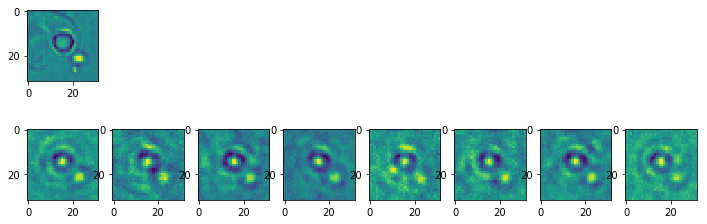

[ 0.2201966   0.02980132  0.22019976  0.22019932  0.02980103  0.02980113
  0.22019984  0.029801  ]
[ 0.2201966   0.02980132  0.22019976  0.22019932  0.02980103  0.02980113
  0.22019984  0.029801  ]
[ 0.22019659  0.02980133  0.22019976  0.22019932  0.02980103  0.02980113
  0.22019984  0.029801  ]
[ 0.22019647  0.02980136  0.22019979  0.22019932  0.02980105  0.02980116
  0.22019987  0.02980101]
[ 0.22019659  0.02980133  0.22019976  0.22019932  0.02980103  0.02980113
  0.22019984  0.029801  ]
(8, 128, 128)
Epoch:  3 Iteration:  400 Loss:  3305.47 4638.14 [ 1.7516309   1.7516309   1.75163114  1.7516309   1.7516309   1.7516309
  1.7516309   1.7516309   1.75163126  1.75163126  1.7516309   1.7516309
  1.75163126  1.75163126  1.7516309   1.75163138  1.7516309   1.75163114
  1.7516309   1.75163114  1.7516309   1.75163233  1.7516309   1.75163162
  1.7516309   1.75163162  1.7516309   1.7516309   1.75163114  1.75163114
  1.75163114  1.7516309   1.7516309   1.75163126  1.75163162  1.75163126
  1.75

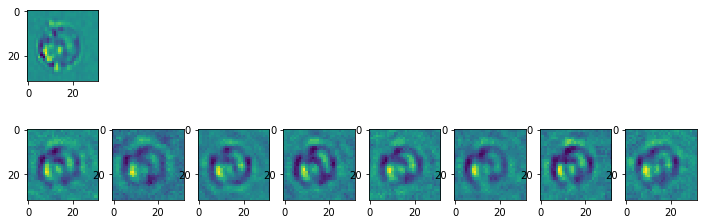

[ 0.2201969   0.02980126  0.2201997   0.22019929  0.029801    0.02980108
  0.22019976  0.02980097]
[ 0.22019687  0.02980126  0.22019969  0.22019929  0.029801    0.02980108
  0.22019976  0.02980097]
[ 0.22019687  0.02980126  0.22019969  0.22019929  0.029801    0.02980108
  0.22019976  0.02980097]
[ 0.22019672  0.0298013   0.22019972  0.2201993   0.02980102  0.02980111
  0.22019979  0.02980099]
[ 0.22019687  0.02980126  0.22019969  0.22019929  0.029801    0.02980108
  0.22019976  0.02980097]
(8, 128, 128)
Epoch:  3 Iteration:  600 Loss:  3302.19 4634.82 [ 1.75163066  1.75163066  1.75163066  1.75163066  1.75163066  1.75163066
  1.75163066  1.75163102  1.75163066  1.75163066  1.75163066  1.7516309
  1.75163078  1.7516309   1.75163066  1.75163066  1.75163126  1.75163066
  1.75163102  1.7516309   1.75163078  1.75163066  1.75163066  1.75163066
  1.7516309   1.75163066  1.75163066  1.75163078  1.75163066  1.75163066
  1.7516309   1.75163066  1.75163066  1.7516309   1.75163078  1.75163066
  1.7

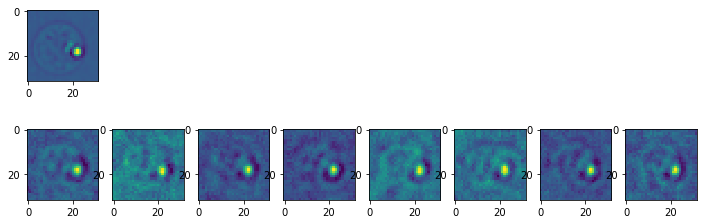

[ 0.22019717  0.0298012   0.22019966  0.22019932  0.02980097  0.02980104
  0.22019972  0.02980094]
[ 0.22019714  0.0298012   0.22019966  0.22019929  0.02980097  0.02980104
  0.22019972  0.02980095]
[ 0.22019714  0.0298012   0.22019966  0.22019932  0.02980097  0.02980104
  0.22019972  0.02980095]
[ 0.22019696  0.02980125  0.22019969  0.2201993   0.02980099  0.02980108
  0.22019975  0.02980097]
[ 0.22019716  0.0298012   0.22019966  0.22019932  0.02980097  0.02980104
  0.22019972  0.02980094]
(8, 128, 128)
Epoch:  3 Iteration:  800 Loss:  3306.86 4639.54 [ 1.75163054  1.75163054  1.75163054  1.75163054  1.75163054  1.75163054
  1.75163054  1.75163054  1.75163078  1.75163054  1.75163054  1.75163054
  1.75163054  1.75163054  1.75163054  1.75163066  1.75163054  1.75163054
  1.75163054  1.75163054  1.75163066  1.75163054  1.75163054  1.75163054
  1.75163054  1.75163054  1.75163054  1.75163054  1.75163054  1.75163054
  1.75163054  1.75163054  1.75163054  1.75163054  1.75163054  1.75163054
  1.

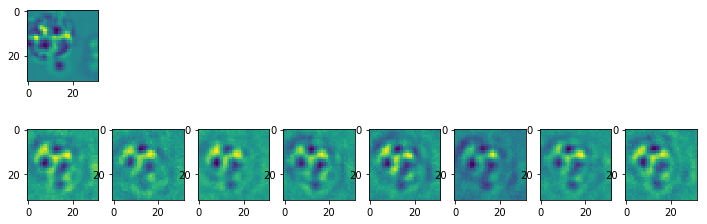

[ 0.22019738  0.02980116  0.22019961  0.22019929  0.02980095  0.02980101
  0.22019967  0.02980092]
[ 0.22019739  0.02980115  0.22019961  0.22019929  0.02980095  0.02980101
  0.22019967  0.02980092]
[ 0.22019738  0.02980115  0.2201996   0.2201993   0.02980095  0.02980101
  0.22019966  0.02980092]
[ 0.22019723  0.02980119  0.22019964  0.22019932  0.02980097  0.02980104
  0.2201997   0.02980094]
[ 0.22019739  0.02980115  0.22019961  0.22019929  0.02980094  0.02980101
  0.22019967  0.02980092]
(8, 128, 128)
Epoch:  3 Iteration:  1000 Loss:  3295.56 4628.18 [ 1.75163007  1.75163031  1.75163007  1.75163031  1.75163031  1.75163007
  1.75163007  1.75163007  1.75163007  1.75163054  1.75163031  1.75163031
  1.75163031  1.75163054  1.75163043  1.75163031  1.75163031  1.75163031
  1.75163031  1.75163007  1.75163031  1.75163007  1.75163007  1.75163031
  1.75163007  1.75163031  1.75163007  1.75163031  1.75163007  1.75163007
  1.75163007  1.75163007  1.75163031  1.75163031  1.75163031  1.75163007
  1

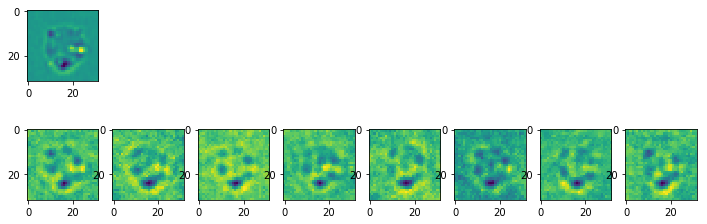

[ 0.22019759  0.0298011   0.22019957  0.22019929  0.02980092  0.02980098
  0.22019963  0.0298009 ]
[ 0.22019759  0.02980111  0.22019957  0.22019929  0.02980092  0.02980098
  0.22019963  0.0298009 ]
[ 0.22019759  0.02980111  0.2201996   0.22019932  0.02980093  0.02980099
  0.22019966  0.0298009 ]
[ 0.22019741  0.02980115  0.22019961  0.22019929  0.02980095  0.02980101
  0.22019967  0.02980092]
[ 0.22019759  0.02980111  0.22019957  0.22019929  0.02980092  0.02980098
  0.22019963  0.0298009 ]
(8, 128, 128)
Epoch:  3 Iteration:  1200 Loss:  3295.37 4628.04 [ 1.75163007  1.75163007  1.75162995  1.75162995  1.75163007  1.75162995
  1.75163031  1.75162983  1.75162983  1.75163007  1.75163007  1.75163007
  1.75162983  1.75162995  1.75163007  1.75162983  1.75163007  1.75163007
  1.75162995  1.75163007  1.75162995  1.75162995  1.75163007  1.75163007
  1.75162983  1.75163007  1.75163007  1.75163007  1.75163007  1.75163043
  1.75163007  1.75162995  1.75163007  1.75163031  1.75162983  1.75163007
  1

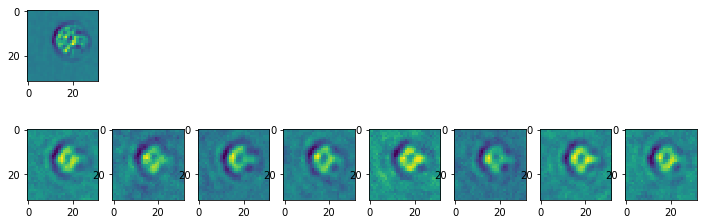

[ 0.22019777  0.02980106  0.22019953  0.2201993   0.0298009   0.02980095
  0.22019958  0.02980088]
[ 0.22019777  0.02980107  0.22019953  0.2201993   0.0298009   0.02980095
  0.22019958  0.02980088]
[ 0.22019777  0.02980107  0.22019953  0.2201993   0.0298009   0.02980096
  0.22019958  0.02980088]
[ 0.2201976   0.0298011   0.22019956  0.22019927  0.02980092  0.02980098
  0.22019961  0.0298009 ]
[ 0.22019777  0.02980107  0.22019953  0.22019929  0.0298009   0.02980095
  0.22019958  0.02980088]
(8, 128, 128)
Epoch:  3 Iteration:  1400 Loss:  3285.49 4618.17 [ 1.75162983  1.75162983  1.75162983  1.75162983  1.75162983  1.75162983
  1.75162983  1.75162983  1.75162983  1.75162983  1.75162983  1.75162983
  1.75162995  1.75162983  1.75162983  1.75162983  1.75162983  1.75162983
  1.75162983  1.75162983  1.75162983  1.75162983  1.75162983  1.75162983
  1.75162983  1.75162995  1.75162983  1.75162983  1.75162983  1.75162983
  1.75162983  1.75162983  1.75162995  1.75162983  1.75162983  1.75162983
  1

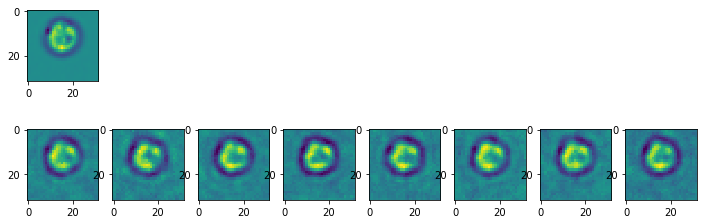

[ 0.2201979   0.02980103  0.2201995   0.22019929  0.02980088  0.02980093
  0.22019956  0.02980087]
[ 0.22019793  0.02980103  0.2201995   0.22019929  0.02980088  0.02980093
  0.22019956  0.02980087]
[ 0.2201979   0.02980103  0.2201995   0.22019929  0.02980088  0.02980093
  0.22019956  0.02980087]
[ 0.22019778  0.02980107  0.22019953  0.2201993   0.0298009   0.02980096
  0.22019958  0.02980088]
[ 0.22019793  0.02980103  0.2201995   0.22019929  0.02980088  0.02980093
  0.22019956  0.02980086]


KeyboardInterrupt: 

In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 40
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 128 #128 + 64
p_droprate = 0.95
p_stdev = .04
p_nclusters = 8

enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['nclusters'] = p_nclusters
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-05-18-Mixture"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_mixture.train(p_mmdict, p_df, params, 200, cpdir)

In [ ]:
x = 4
x